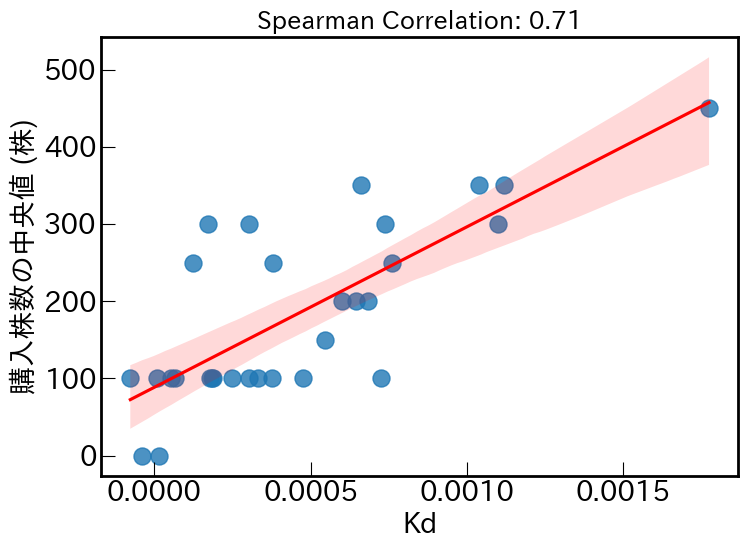

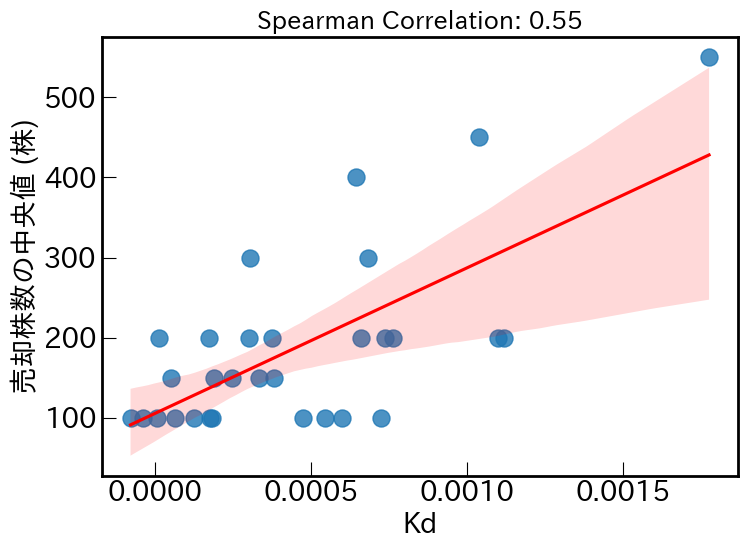

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_path = '2nd_trading_trend_2023.csv'
filtered_df = pd.read_csv(csv_path)

# 画像を保存するフォルダを作成
output_folder = 'スライド回帰直線付き_本論'
os.makedirs(output_folder, exist_ok=True)
plt.rcParams['axes.unicode_minus'] = False

# 'Kp'が下位5人を除外
#filtered_df = filtered_df.sort_values(by='Kd', ascending=True).iloc[1:]
# 'Kp' 列が正の値を持つ行を除外
#filtered_df = filtered_df[filtered_df['Kp'] <= 0]

# 'Kp' 列と他の列の組み合わせだけの散布図を保存するためのデータフレーム
results_kp_df = pd.DataFrame(columns=['Feature1', 'Feature2', 'Correlation_Coefficient'])

# カスタムラベルリスト
custom_labels = [
    'Kp',
    '購入株数の最大値 (株)',
    '売却株数の最大値 (株)'
]

# 各ペアの散布図にスピアマンの相関係数を表示して表示
columns = filtered_df[['Kd', 'Max_purchase_num', 'Max_disposal_num']]
#columns = filtered_df[['Kp', 'Range_Med', 'Range_Max']]  # 'Max_purchase_num', 'Max_disposal_num'
 
for col2 in columns:
    if col2 != 'Kd':
        plt.figure(figsize=(8, 6))
        
        # regplotを使用して回帰直線を追加
        scatter_plot = sns.regplot(x=filtered_df['Kd'], y=filtered_df[col2], scatter_kws={'s': 150}, line_kws={'color': 'red'})
        
        plt.xlabel(custom_labels[0], fontsize=20)  # xlabelの文字サイズ指定
        plt.ylabel(custom_labels[columns.columns.get_loc(col2)], fontsize=20)  # ylabelの文字サイズ指定

        # スピアマンの相関係数をテキストで表示（少数第2位まで）
        spearman_corr = round(filtered_df[['Kd', col2]].corr(method='spearman').iloc[0, 1], 2)
        
        # 回帰直線の係数を計算
        #model = sns.regplot(x=filtered_df['Kp'], y=filtered_df[col2], scatter=False)
        #intercept, slope = model.get_lines()[0].get_data()
        
        plt.title(f'Spearman Correlation: {spearman_corr}', fontsize=18)

        # 'Kp' 列と他の列の組み合わせだけの結果をデータフレームに追加
        results_kp_df = pd.concat([
            results_kp_df,
            pd.DataFrame({
                'Feature1': [custom_labels[0]],
                'Feature2': [custom_labels[columns.columns.get_loc(col2)]],
                'Correlation_Coefficient': [spearman_corr],
                #'Intercept': [intercept[1]],  # Interceptの値
                #'Slope': [slope[1]]  # Slopeの値
            })
        ], ignore_index=True)
        
        plt.tight_layout()

        # 画像を保存
        #output_file = f'2nd_Kd{custom_labels[0]}_vs_{custom_labels[columns.columns.get_loc(col2)]}_scatterplot.png'
        #plt.savefig(os.path.join(output_folder, output_file))
        
        plt.show()

# 'Kp' 列と他の列の組み合わせだけの結果をCSVファイルとして保存
#results_kp_df.to_csv(os.path.join(output_folder, '3rd_Kp.csv'), index=False, encoding='utf-8')


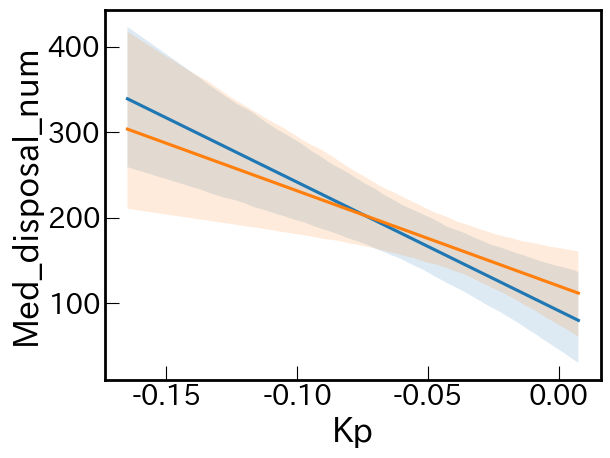

In [31]:
import os
import pandas as pd
import seaborn as sns

# CSVファイルからデータを読み込む
csv_path = '2nd_trading_trend_2023.csv'
filtered_df = pd.read_csv(csv_path)

# 画像を保存するフォルダを作成
output_folder = 'スライド回帰直線付き_本論'
os.makedirs(output_folder, exist_ok=True)
# 'Kp'が下位5人を除外
#filtered_df = filtered_df.sort_values(by='Kp', ascending=True).iloc[1:]
# 'Kp'が下位5人を除外
#filtered_df = filtered_df[filtered_df['Kp'] <= 0]

# 'Kp' 列と他の列の組み合わせだけのデータフレーム
results_kp_df = pd.DataFrame(columns=['Feature1', 'Feature2', 'Correlation_Coefficient', 'Intercept', 'Slope'])

# カスタムラベルリスト
custom_labels = [
    'Kp',
    'Med_purchase_num',
    'Med_disposal_num'
]

# 各ペアのスピアマンの相関係数と回帰直線の係数を計算
columns = filtered_df[['Kp', 'Med_purchase_num', 'Med_disposal_num']]
for col2 in columns:
    if col2 != 'Kp':
        # スピアマンの相関係数を計算
        spearman_corr = round(filtered_df[['Kp', col2]].corr(method='spearman').iloc[0, 1], 2)

        # 回帰直線の係数を計算
        model = sns.regplot(x=filtered_df['Kp'], y=filtered_df[col2], scatter=False)
        intercept, slope = model.get_lines()[0].get_data()

        # 'Kp' 列と他の列の組み合わせだけの結果をデータフレームに追加
        results_kp_df = pd.concat([
            results_kp_df,
            pd.DataFrame({
                'Feature1': [custom_labels[0]],
                'Feature2': [custom_labels[columns.columns.get_loc(col2)]],
                'Correlation_Coefficient': [spearman_corr],
                'Intercept': [intercept[1]],  # Interceptの値
                'Slope': [slope[1]]  # Slopeの値
            })
        ], ignore_index=True)

# 'Kp' 列と他の列の組み合わせだけの結果をCSVファイルとして保存
results_kp_df.to_csv(os.path.join(output_folder, '2nd_Kp_regression_and_correlation.csv'), index=False, encoding='utf-8')


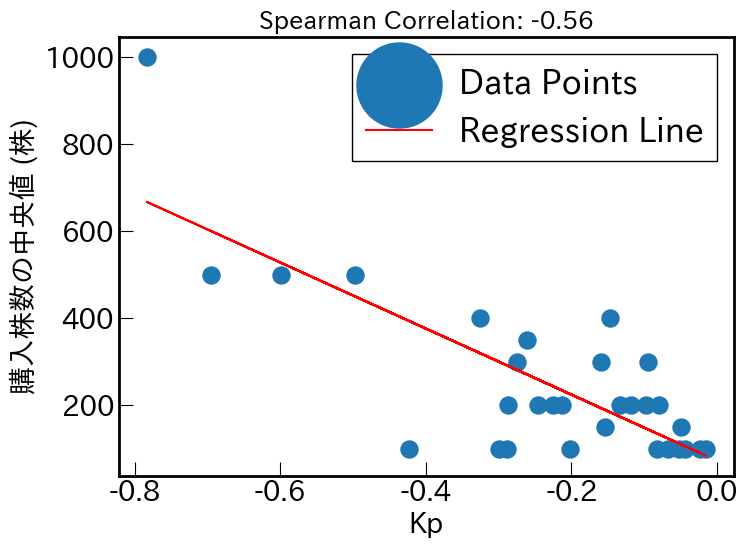

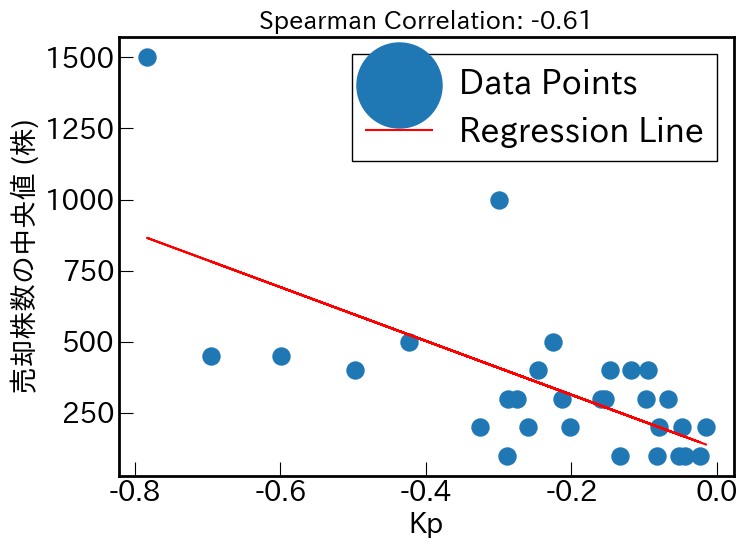

In [36]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 日本語フォントの設定
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_path = '1st_trading_trend_2023.csv'
filtered_df = pd.read_csv(csv_path)

# 画像を保存するフォルダを作成
output_folder = 'スライド回帰直線付き_本論'
os.makedirs(output_folder, exist_ok=True)
plt.rcParams['axes.unicode_minus'] = False

# 'Kp'が下位5人を除外
#filtered_df = filtered_df.sort_values(by='Kp', ascending=True).iloc[1:]
# 'Kp' 列が正の値を持つ行を除外
filtered_df = filtered_df[filtered_df['Kp'] <= 0]

# 'Kp' 列と他の列の組み合わせだけの散布図を保存するためのデータフレーム
results_kp_df = pd.DataFrame(columns=['Feature1', 'Feature2', 'Correlation_Coefficient'])

# カスタムラベルリスト
custom_labels = [
    'Kp',
    '購入株数の中央値 (株)',
    '売却株数の中央値 (株)'
]

# 各ペアの散布図にスピアマンの相関係数を表示して表示
columns = filtered_df[['Kp', 'Med_purchase_num', 'Med_disposal_num']]
#columns = filtered_df[['Kp', 'Range_Med', 'Range_Max']]  # 'Max_purchase_num', 'Max_disposal_num'
 
for col2 in columns:
    if col2 != 'Kp':
        plt.figure(figsize=(8, 6))
        
        # 散布図を描画
        plt.scatter(filtered_df['Kp'], filtered_df[col2], s=150, label='Data Points')
        
        # 回帰直線の係数を計算
        coef = np.polyfit(filtered_df['Kp'], filtered_df[col2], 1)
        poly1d_fn = np.poly1d(coef)
        
        # 回帰直線を描画
        plt.plot(filtered_df['Kp'], poly1d_fn(filtered_df['Kp']), color='red', label='Regression Line')
        
        plt.xlabel(custom_labels[0], fontsize=20)  # xlabelの文字サイズ指定
        plt.ylabel(custom_labels[columns.columns.get_loc(col2)], fontsize=20)  # ylabelの文字サイズ指定

        # スピアマンの相関係数をテキストで表示（少数第2位まで）
        spearman_corr = round(filtered_df[['Kp', col2]].corr(method='spearman').iloc[0, 1], 2)
        
        plt.title(f'Spearman Correlation: {spearman_corr}', fontsize=18)
        
        plt.legend()
        plt.tight_layout()

        # 画像を保存
        #output_file = f'2nd{custom_labels[0]}_vs_{custom_labels[columns.columns.get_loc(col2)]}_scatterplot.png'
        #plt.savefig(os.path.join(output_folder, output_file))
        
        plt.show()

        # 'Kp' 列と他の列の組み合わせだけの結果をデータフレームに追加
        results_kp_df = pd.concat([
            results_kp_df,
            pd.DataFrame({
                'Feature1': [custom_labels[0]],
                'Feature2': [custom_labels[columns.columns.get_loc(col2)]],
                'Correlation_Coefficient': [spearman_corr],
            })
        ], ignore_index=True)

# 'Kp' 列と他の列の組み合わせだけの結果をCSVファイルとして保存
# results_kp_df.to_csv(os.path.join(output_folder, '3rd_Kp.csv'), index=False, encoding='utf-8')


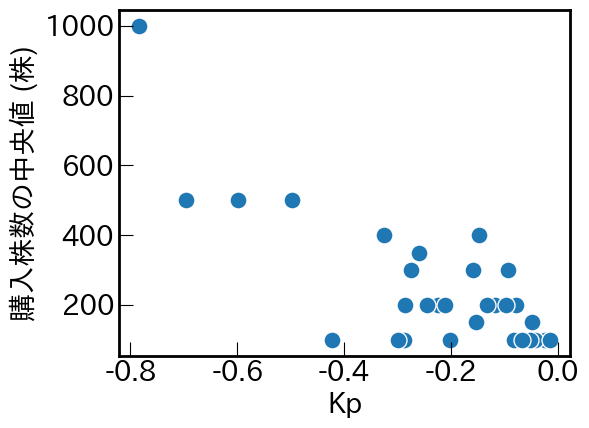

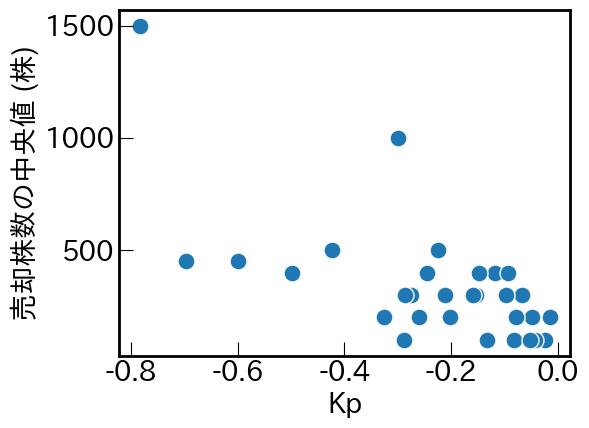

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_path = '1st_trading_trend_2023.csv'
filtered_df = pd.read_csv(csv_path)

# 画像を保存するフォルダを作成
output_folder = '1stスライドKp3'
os.makedirs(output_folder, exist_ok=True)
plt.rcParams['axes.unicode_minus'] = False

# 'Kp'が下位5人を除外
#filtered_df = filtered_df.sort_values(by='Kp', ascending=True).iloc[1:]
# 'Kp' 列が正の値を持つ行を除外
filtered_df = filtered_df[filtered_df['Kp'] <= 0]
#filtered_df = filtered_df[filtered_df['positive_count'] >= 2]
#filtered_df = filtered_df[filtered_df['negative_count'] >= 2]
# 'Kp' 列と他の列の組み合わせだけの散布図を保存するためのデータフレーム
results_kp_df = pd.DataFrame(columns=['Feature1', 'Feature2', 'Correlation_Coefficient'])

# カスタムラベルリスト
custom_labels = [
    'Kp', 
    '購入株数の中央値 (株)',
    '売却株数の中央値 (株)'
]

# 各ペアの散布図にスピアマンの相関係数を表示して表示
#columns = filtered_df[['Kp', 'Med_purchase_num', 'Max_purchase_num', 'Med_disposal_num', 'Max_disposal_num']]
columns = filtered_df[['Kp', 'Med_purchase_num', 'Med_disposal_num']]
#columns = filtered_df[['Kp', 'Range_Med']]

for col2 in columns:
    if col2 != 'Kp':
        #plt.figure(figsize=(6, 6))
        scatter_plot = sns.scatterplot(x=filtered_df['Kp'], y=filtered_df[col2],s=150)
        plt.xlabel(custom_labels[0], fontsize=20)  # xlabelの文字サイズ指定
        plt.ylabel(custom_labels[columns.columns.get_loc(col2)], fontsize=20)  # ylabelの文字サイズ指定

        # スピアマンの相関係数をテキストで表示（少数第2位まで）
        spearman_corr = round(filtered_df[['Kp', col2]].corr(method='spearman').iloc[0, 1], 2)

        # 'Kp' 列と他の列の組み合わせだけの結果をデータフレームに追加
        results_kp_df = pd.concat([
            results_kp_df,
            pd.DataFrame({
                'Feature1': [custom_labels[0]],
                'Feature2': [custom_labels[columns.columns.get_loc(col2)]],
                'Correlation_Coefficient': [spearman_corr],
            })
        ], ignore_index=True)
        
        plt.tight_layout()

        # 画像を保存
        output_file = f'{custom_labels[0]}_vs_{custom_labels[columns.columns.get_loc(col2)]}_scatterplot.png'
        plt.savefig(os.path.join(output_folder, output_file))
        
        plt.show()
        

# 'Kp' 列と他の列の組み合わせだけの結果をCSVファイルとして保存
results_kp_df.to_csv(os.path.join(output_folder, '1st_スライド_Kp2.csv'), index=False, encoding='utf-8')



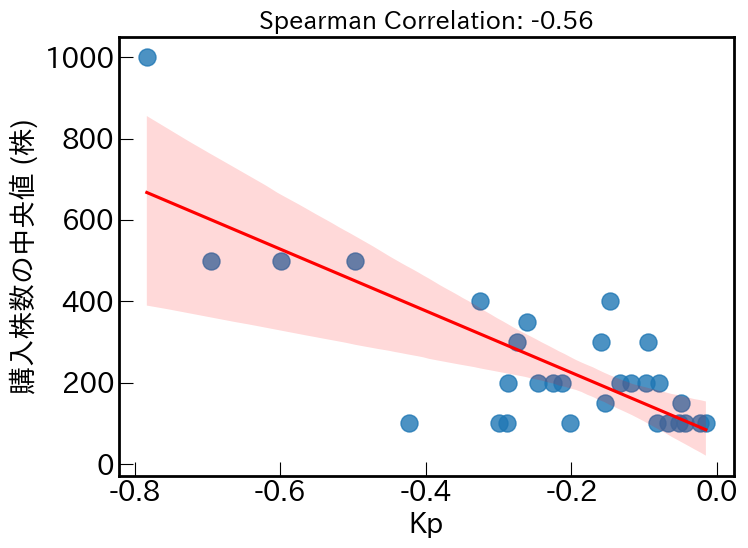

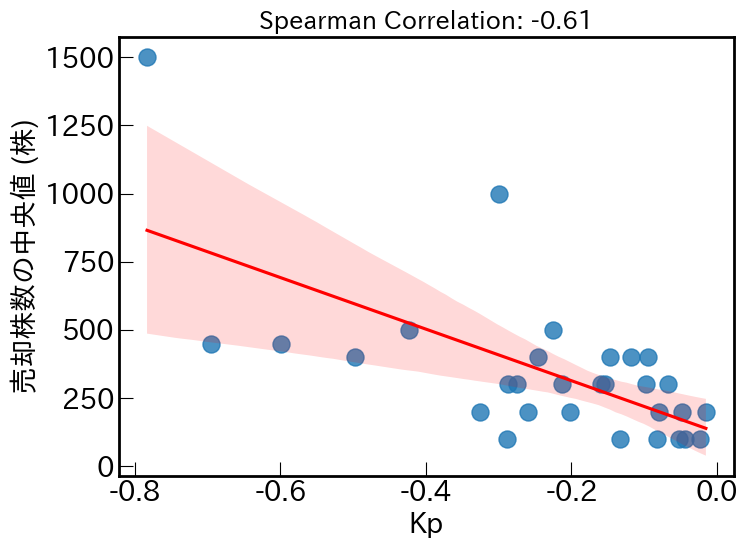

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語フォントの設定
plt.rcParams['font.family'] = 'IPAexGothic'

# CSVファイルからデータを読み込む
csv_path = '1st_trading_trend_2023.csv'
filtered_df = pd.read_csv(csv_path)

# 画像を保存するフォルダを作成
output_folder = '1st_S'
os.makedirs(output_folder, exist_ok=True)
plt.rcParams['axes.unicode_minus'] = False

# 'Kp'が下位5人を除外
#filtered_df = filtered_df.sort_values(by='Kp', ascending=True).iloc[1:]
# 'Kp' 列が正の値を持つ行を除外
filtered_df = filtered_df[filtered_df['Kp'] <= 0]

# 'Kp' 列と他の列の組み合わせだけの散布図を保存するためのデータフレーム
results_kp_df = pd.DataFrame(columns=['Feature1', 'Feature2', 'Correlation_Coefficient'])

# カスタムラベルリスト
custom_labels = [
    'Kp',
    '購入株数の中央値 (株)',
    '売却株数の中央値 (株)'
]

# 各ペアの散布図にスピアマンの相関係数を表示して表示
columns = filtered_df[['Kp', 'Med_purchase_num', 'Med_disposal_num']]
#columns = filtered_df[['Kp', 'Range_Med', 'Range_Max']]  # 'Max_purchase_num', 'Max_disposal_num'
 
for col2 in columns:
    if col2 != 'Kp':
        plt.figure(figsize=(8, 6))
        
        # regplotを使用して回帰直線を追加
        scatter_plot = sns.regplot(x=filtered_df['Kp'], y=filtered_df[col2], scatter_kws={'s': 150}, line_kws={'color': 'red'})
        
        plt.xlabel(custom_labels[0], fontsize=20)  # xlabelの文字サイズ指定
        plt.ylabel(custom_labels[columns.columns.get_loc(col2)], fontsize=20)  # ylabelの文字サイズ指定

        # スピアマンの相関係数をテキストで表示（少数第2位まで）
        spearman_corr = round(filtered_df[['Kp', col2]].corr(method='spearman').iloc[0, 1], 2)
        
        plt.title(f'Spearman Correlation: {spearman_corr}', fontsize=18)

        # 'Kp' 列と他の列の組み合わせだけの結果をデータフレームに追加
        results_kp_df = pd.concat([
            results_kp_df,
            pd.DataFrame({
                'Feature1': [custom_labels[0]],
                'Feature2': [custom_labels[columns.columns.get_loc(col2)]],
                'Correlation_Coefficient': [spearman_corr],
            })
        ], ignore_index=True)
        
        plt.tight_layout()

        # 画像を保存
        #output_file = f'外れ値処理{custom_labels[0]}_vs_{custom_labels[columns.columns.get_loc(col2)]}_scatterplot.png'
        #plt.savefig(os.path.join(output_folder, output_file))
        
        plt.show()

# 'Kp' 列と他の列の組み合わせだけの結果をCSVファイルとして保存
#results_kp_df.to_csv(os.path.join(output_folder, '4th_CR_Kp.csv'), index=False, encoding='utf-8')


In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt

# CSVファイルのパス
#csv_path = '1st_trading_trend_2023.csv'
# Create a folder to save images if it doesn't exist
#output_folder = '図修正'

#フォント設定
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
#plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 24 #24 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 20 #20 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 20 # 軸だけ変更されます


#軸設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛りの向き
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛りの向き

#軸大きさ
#plt.rcParams["xtick.major.width"] = 1.0             #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.0             #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0             #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0             #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10               #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10               #y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["axes.linewidth"] = 2.0                #囲みの太さ

#凡例設定
plt.rcParams["legend.fancybox"] = False  # 丸角OFF
plt.rcParams["legend.framealpha"] = 1  # 透明度の指定、0で塗りつぶしなし
plt.rcParams["legend.edgecolor"] = 'black'  # edgeの色を変更
plt.rcParams["legend.markerscale"] = 5 #markerサイズの倍率
